In [1]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

## MNIST

In [2]:
import numpy as np
from sklearn import manifold
from sklearn import datasets

digits = datasets.load_digits(n_class=6)
X = digits.data / 255.
y = digits.target
n_samples, n_features = X.shape
n_neighbors = 30

print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(X)

Computing t-SNE embedding


/Users/joshua/.virtualenv/ds/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


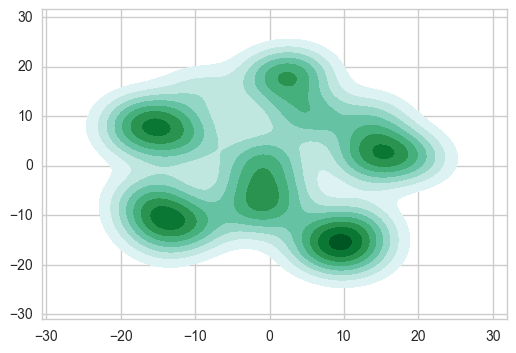

In [3]:
sns.kdeplot(X_tsne[:, 0], X_tsne[:, 1], shade=True, shade_lowest=False)

## Fit Clustering Algorithms

In [45]:
from sklearn.cluster import KMeans
from clumpy.k_medoids import KMedoids
from hdbscan import HDBSCAN

kmeans_4 = KMeans(n_clusters=4, random_state=12)
kmeans_5 = KMeans(n_clusters=5, random_state=12)
kmeans_6 = KMeans(n_clusters=6, random_state=12)
kmedoids_4 = KMedoids(n_clusters=4, random_state=12)
kmedoids_6 = KMedoids(n_clusters=6, random_state=12)
hdbscan = HDBSCAN()

labels_4 = kmeans_4.fit_predict(X)
labels_5 = kmeans_5.fit_predict(X)
labels_6 = kmeans_6.fit_predict(X)
labels_hdb = hdbscan.fit_predict(X)
labels_medoids_4 = kmedoids_4.fit_predict(X)
labels_medoids_6 = kmedoids_6.fit_predict(X)

hdbscan.n_clusters = len(np.unique(hdbscan.labels_))

## Plot the Results

In [5]:
def to_dataframe(labels):
    return pd.DataFrame({
        'x': X_tsne[:, 0], 
        'y': X_tsne[:, 1],
        'labels': labels
})

colors = ['Reds', 'Blues', 'Oranges', 'Greens', 'Purples', 'summer']
def plot_cluster(labels):
    cluster_ids = np.unique(labels)
    data = to_dataframe(labels)

    #for cluster_id in cluster_ids:
    #    cluster_data = data.loc[data['labels'] == cluster_id]
    #    ax = sns.kdeplot(
    #        cluster_data.x, 
    #        cluster_data.y, 
    #        shade=True, 
    #        shade_lowest=False,
    #        cmap=colors[cluster_id])
    sns.lmplot('x', 'y', hue='labels', data=data, fit_reg=False)

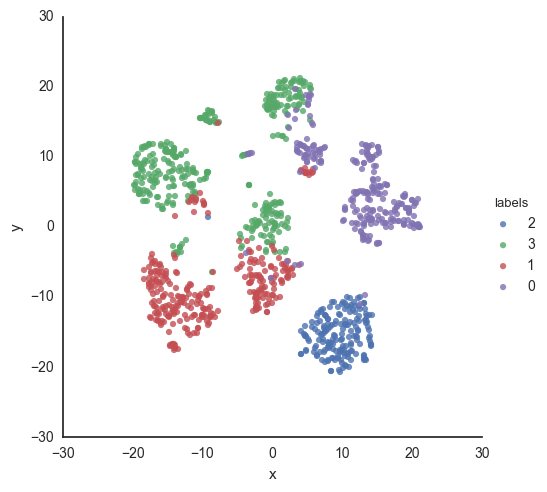

In [6]:
plot_cluster(labels_4)

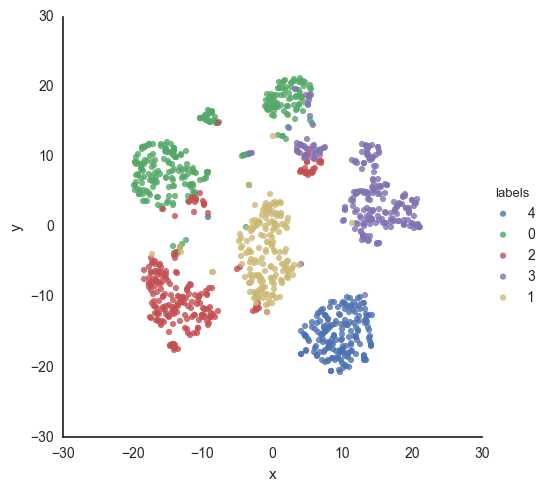

In [7]:
plot_cluster(labels_5)

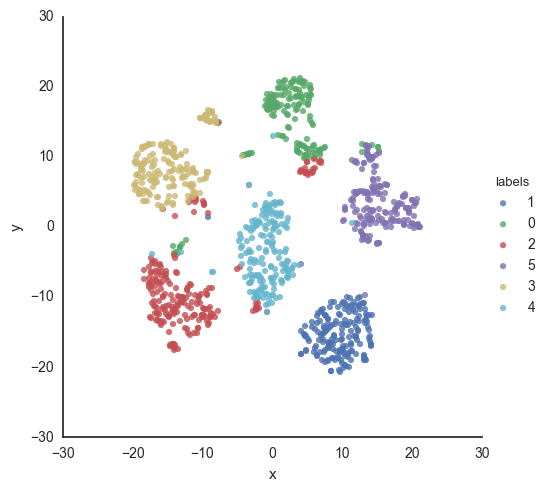

In [8]:
plot_cluster(labels_6)

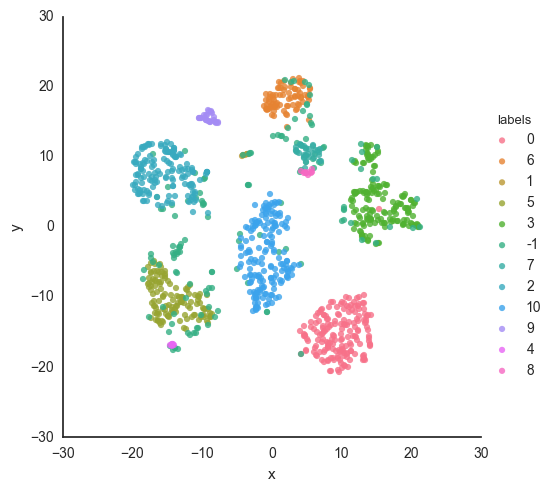

In [9]:
plot_cluster(labels_hdb)

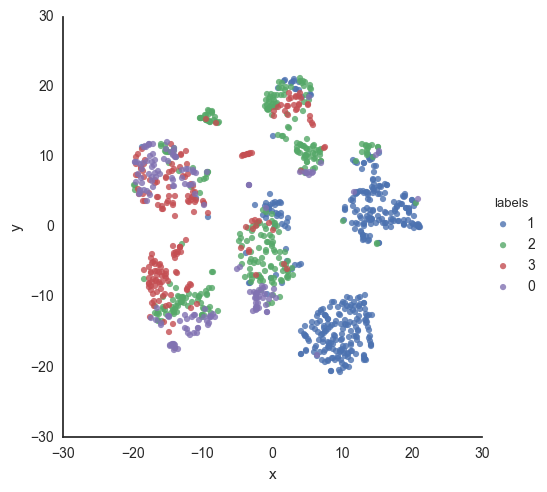

In [46]:
plot_cluster(labels_medoids_4)

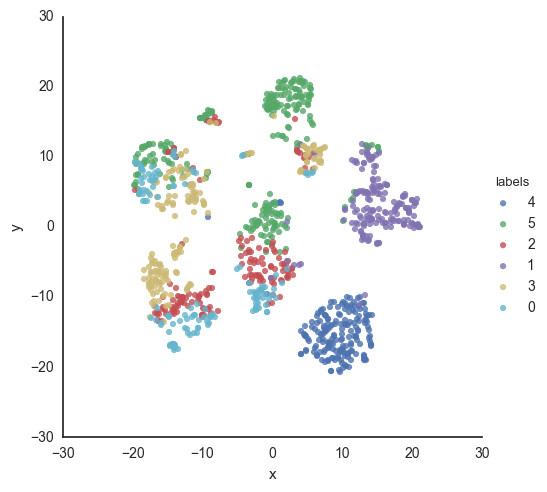

In [47]:
plot_cluster(labels_medoids_6)

## Dig Into Similarities

In [49]:
from clumpy.similarity import cluster_similarity
from clumpy.similarity.cluster_graph import to_similarity_matrix

hdbscan.n_clusters = 11
print to_similarity_matrix(kmeans_4, kmeans_5, X)
print cluster_similarity(kmeans_4, kmeans_5, X)
print cluster_similarity(kmeans_4, kmeans_6, X)
print cluster_similarity(kmeans_5, kmeans_6, X)
print cluster_similarity(kmedoids_6, kmedoids_4, X)
print cluster_similarity(kmeans_6, hdbscan, X)

[[ 0.01717557  0.01196172  0.03267974  0.87951807  0.        ]
 [ 0.          0.23697917  0.65930599  0.          0.        ]
 [ 0.          0.          0.          0.00251889  0.99438202]
 [ 0.75409836  0.17439294  0.00344234  0.          0.        ]]
0.821826112277
0.711743513973
0.868376959006
0.509423784204
0.758886003205


In [39]:
from clumpy.similarity import clusterer_embedding

alg_names = ['kmeans_4', 'kmeans_5', 'kmeans_6', 'hdbscan', 'kmedoids_4', 'kmedoids_6']
algs = [kmeans_4, kmeans_5, kmeans_6, hdbscan, kmedoids_4, kmedoids_6]
embedding = clusterer_embedding(algs, X)

In [54]:
def plot_embedding(embedding, alg_names=[]):
    data = pd.DataFrame({
            "x": embedding[:, 0], 
            'y': embedding[:, 1], 
            'labels': alg_names})
    g = sns.lmplot('x', 'y', data=data, hue='labels', fit_reg=False)
    g.set(yticks=[])
    g.set(xticks=[])

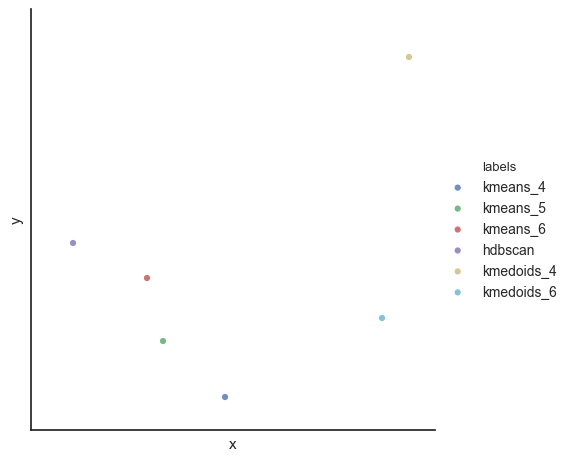

In [59]:
plot_embedding(embedding, alg_names=alg_names)

In [13]:
np.unique(hdbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])